In [66]:
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



df = pd.read_csv('data_filtered.csv').drop('Unnamed: 0',axis=1)
X = df.drop('critical_temp',axis=1)
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y = df['critical_temp']



rf = RandomForestRegressor(n_estimators=200,max_features='log2')
e=0.1515151515151516
intercept = 1.5542
y_t = y.apply(lambda x: (x**e)-intercept)
X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size=0.3, random_state=40)
#3, 9.7
rf.fit(X_train,y_train)

y_test = y_test.apply(lambda x: (x+intercept)**(1/e))
y_train = y_train.apply(lambda x: (x+intercept)**(1/e))


y_pred_test = pd.Series(rf.predict(X_test)).apply(lambda x: (x+intercept)**(1/e))
y_pred_train = pd.Series(rf.predict(X_train)).apply(lambda x: (x+intercept)**(1/e))
min_rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_test)),4)
r2 = r2_score(y_pred_test,y_test)


r2:  0.9081997326335242
rmse:  9.8465


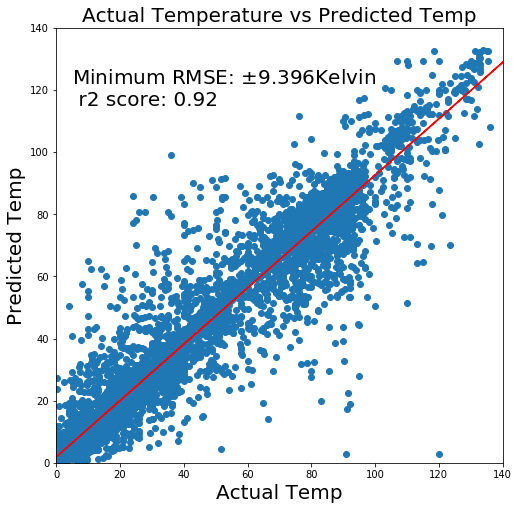

In [75]:
from scipy import stats

y_pred_test = y_pred_test.dropna()
y_pred_train = y_pred_train.dropna()
y_test = y_test.dropna()
y_train = y_train.dropna()



slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred_test)
line = slope*y_test+intercept
plt.figure(figsize=(8,8))
plt.plot(y_test,line,color='red')
plt.scatter(y_test,y_pred_test)
plt.ylabel('Predicted Temp',fontsize=20)
plt.xlabel('Actual Temp',fontsize=20)
plt.ylim(0,140)
plt.xlim(0,140)
text = r'$\pm'+str(9.396)+'$'+'Kelvin \n r2 score: 0.92'
plt.text(5,115,'Minimum RMSE: '+text,fontsize=20)
plt.title('Actual Temperature vs Predicted Temp',fontsize=20)
plt.show()

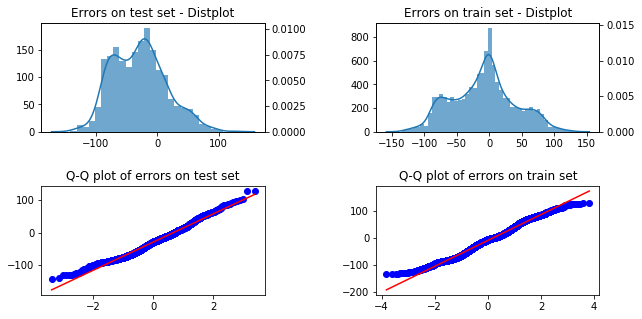

In [29]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats


errors_test = (y_pred_test - y_test).dropna()
errors_train = (y_pred_train - y_train).dropna()

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title('Errors on test set - Distplot')
ax_test = sns.distplot(errors_test, kde=False)
second_ax1 = ax_test.twinx()
sns.distplot(errors_test, ax=second_ax1, kde=True, hist=True)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,2)
plt.title('Errors on train set - Distplot')
ax_train = sns.distplot(errors_train, kde=False)
second_ax2 = ax_train.twinx()
sns.distplot(errors_train, ax=second_ax2, kde=True)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
res = stats.probplot(errors_test, plot=plt)
plt.title('Q-Q plot of errors on test set')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,4)
res = stats.probplot(errors_train, plot=plt)
plt.title('Q-Q plot of errors on train set')
plt.xlabel('')
plt.ylabel('')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
#plt.savefig('Errors_distplot.png')
plt.show()